In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
train_data = pd.read_csv("SalaryData_Train.csv")
test_data = pd.read_csv("SalaryData_Test.csv")

### Train data EDA

In [110]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [111]:
train_data.shape

(30161, 14)

In [112]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [113]:
train_data.duplicated().sum()

3258

In [114]:
train_data.drop_duplicates(keep=False,inplace=True)

In [115]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [116]:
# List of Numerical Variables
num_columns=[feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
num_columns


['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [117]:
# List of Categorical Variables
cat_columns=[feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
cat_columns

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

### Train_data numerical variable visualization

In [118]:
train_data[num_columns].describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000
mean,39.433909,10.151305,1302.317724,105.548811,41.283045
std,13.218143,2.662812,8071.604978,439.763573,12.592211
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,46.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


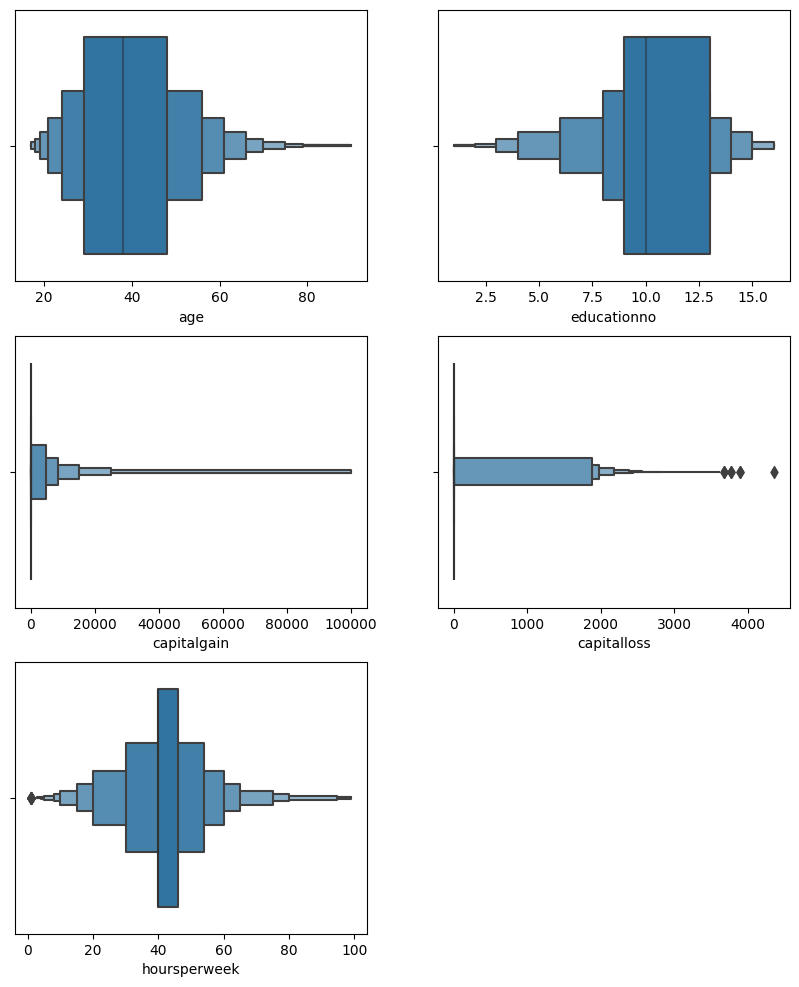

In [119]:
plt.figure(figsize=(10,12))
for i in range(len(num_columns)):
    plt.subplot(3,2,i+1)
    sns.boxenplot(data=train_data, x = num_columns[i])

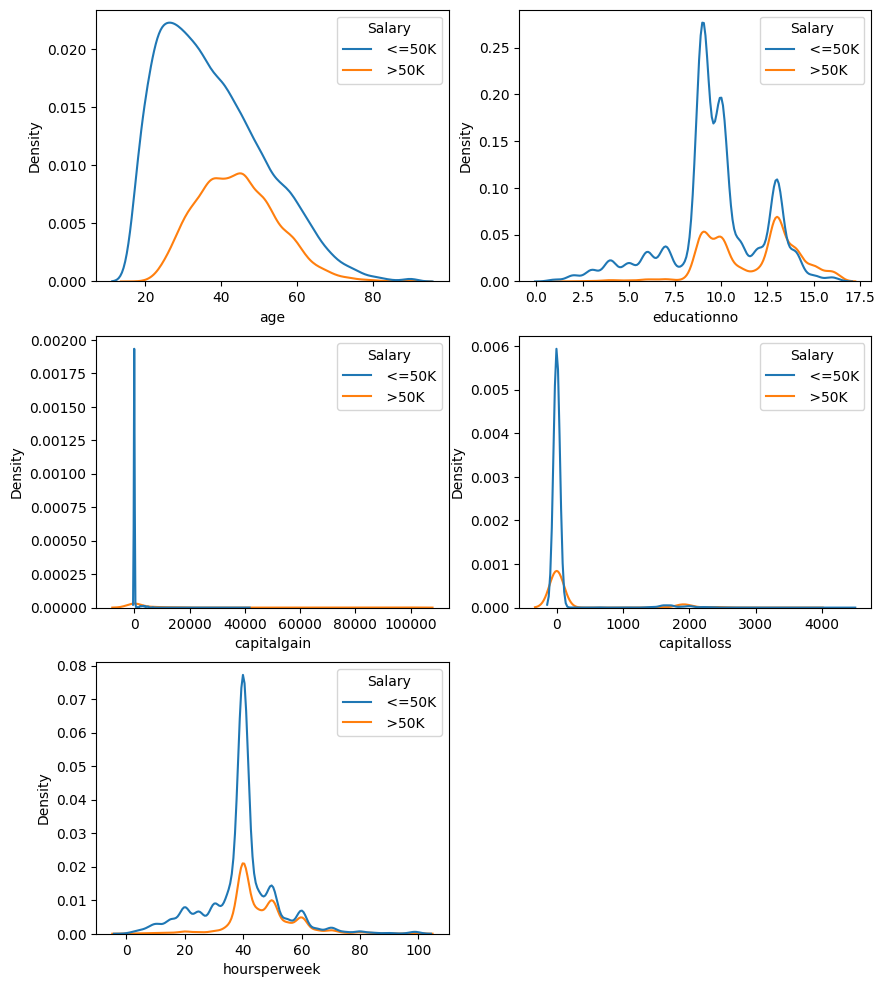

In [120]:
plt.figure(figsize=(10,12))
for i in range(len(num_columns)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=train_data, x = num_columns[i],hue = "Salary")

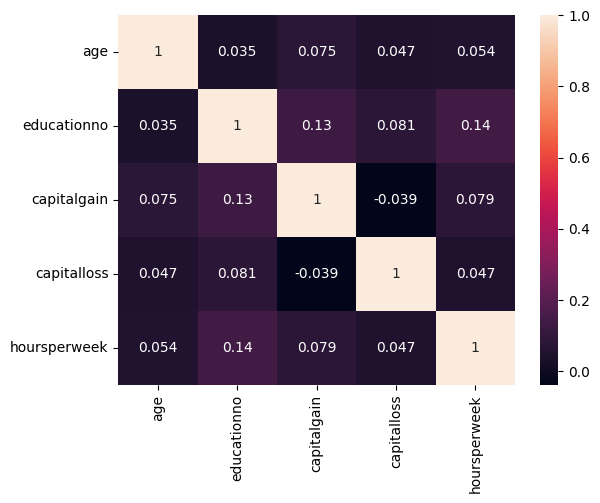

In [121]:
sns.heatmap(train_data[num_columns].corr(), annot=True);

### Train_data categorical varibale visualization

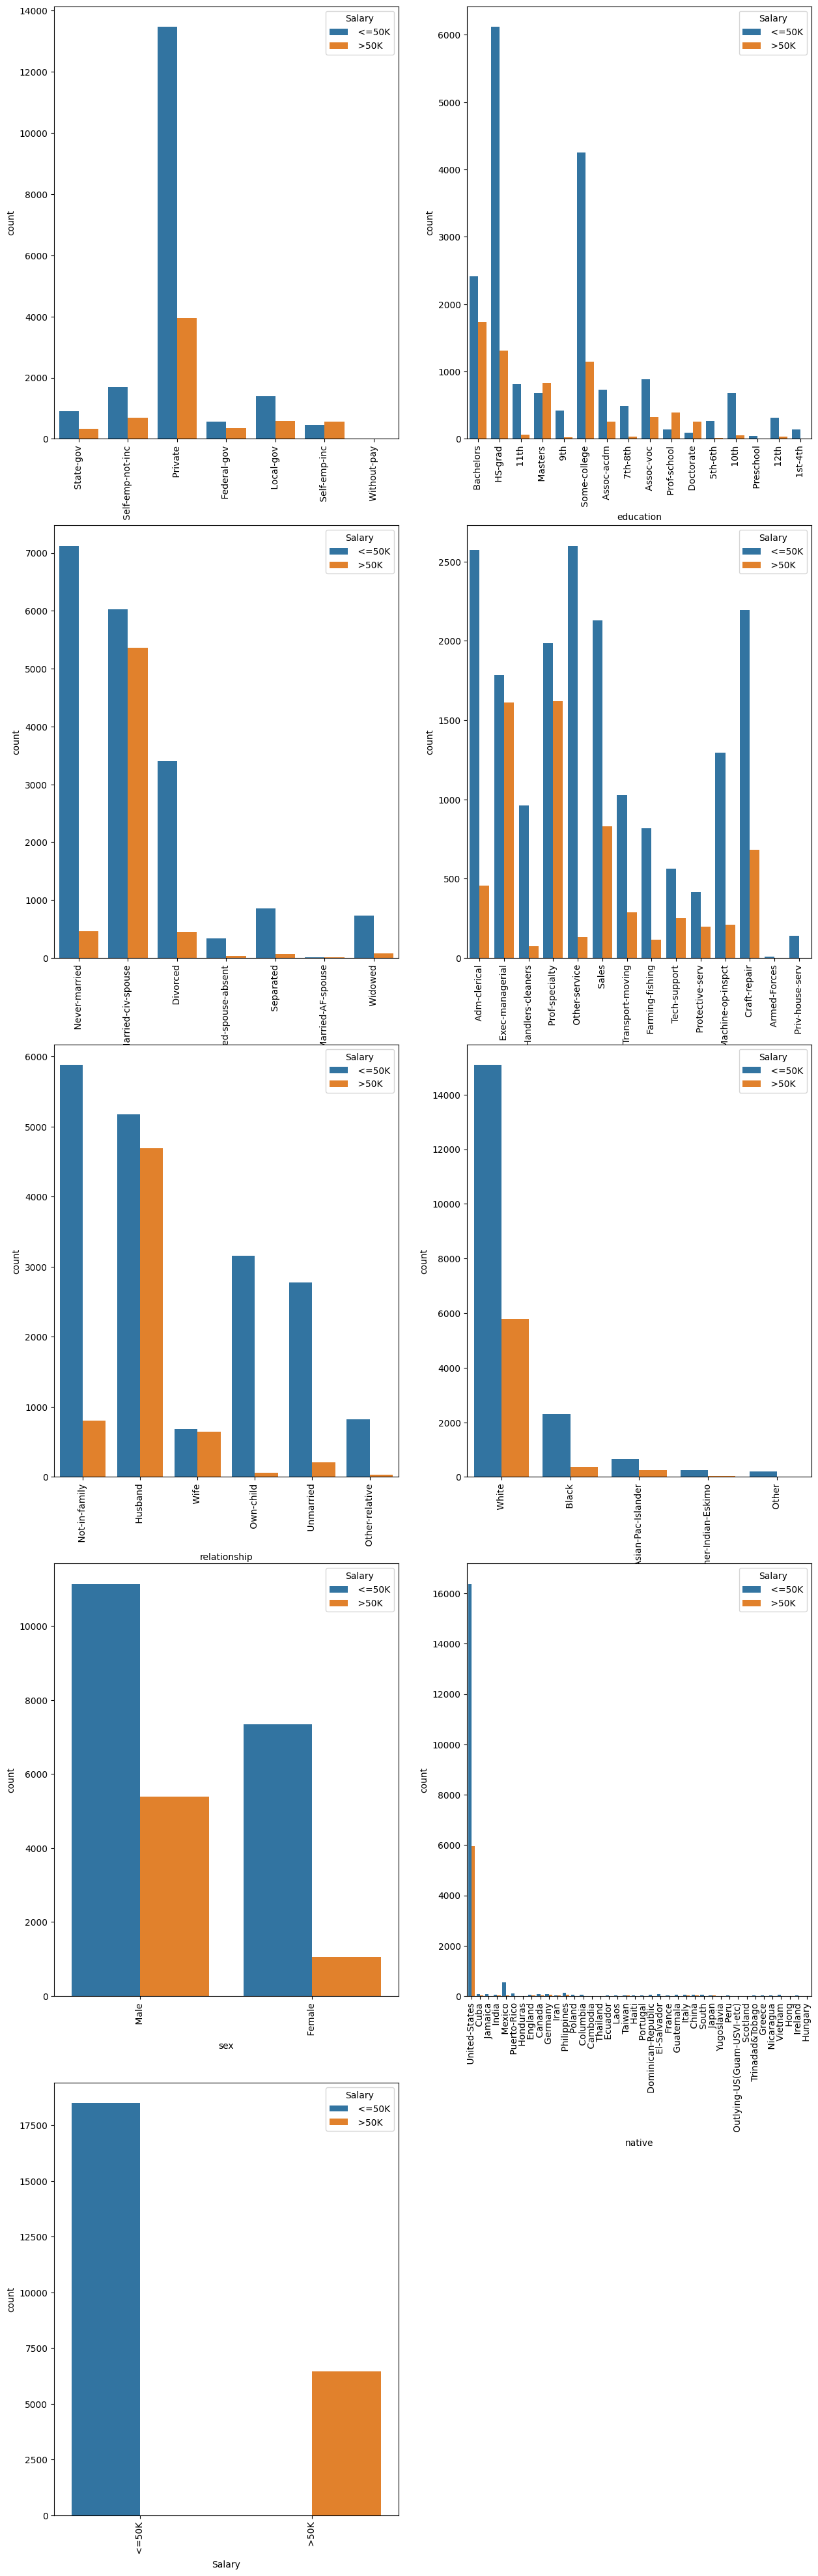

In [122]:
plt.figure(figsize=(15,50))
for i in range(len(cat_columns)):
    plt.subplot(5,2,i+1)
    sns.countplot(data=train_data, x = cat_columns[i],hue = "Salary")
    plt.xticks(rotation=90)

Text(0.5, 1.0, 'gender Distribution')

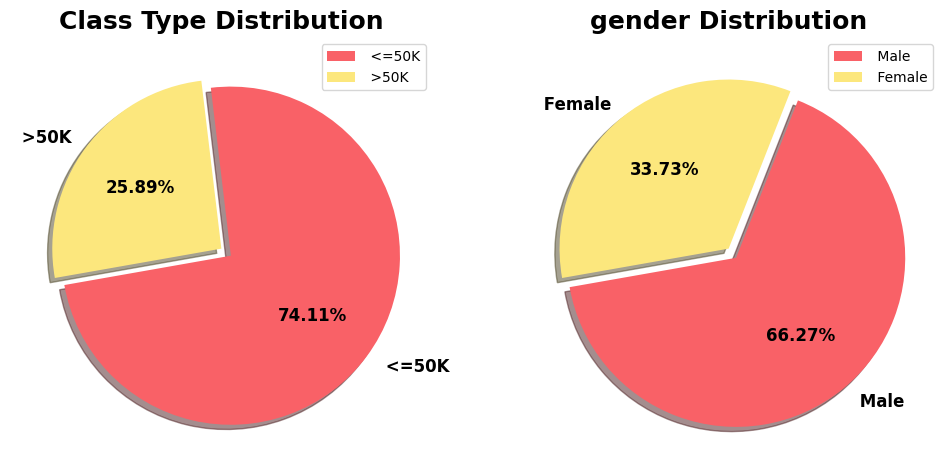

In [123]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(train_data['Salary'].value_counts(),
       labels=train_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})

plt.legend(loc= 'upper right')
plt.title("Class Type Distribution", fontsize = 18, fontweight = 'bold')

plt.subplot(1,2,2)
plt.pie(train_data['sex'].value_counts(),
       labels=train_data.sex.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
                   
plt.legend(loc= 'upper right')
plt.title("gender Distribution", fontsize = 18, fontweight = 'bold')

### test_data EDA

In [124]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [125]:
test_data.shape

(15060, 14)

In [126]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [127]:
test_data.duplicated().sum()

930

In [128]:
test_data.drop_duplicates(keep=False,inplace=True)

In [129]:
# List of Numerical Variables and categorical variables
num_columns=[feature for feature in test_data.columns if test_data[feature].dtypes != 'O']
cat_columns = [feature for feature in test_data.columns if test_data[feature].dtypes == 'O']


### test_data numerical variable visualization

In [130]:
train_data[num_columns].describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000
mean,39.433909,10.151305,1302.317724,105.548811,41.283045
std,13.218143,2.662812,8071.604978,439.763573,12.592211
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,46.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


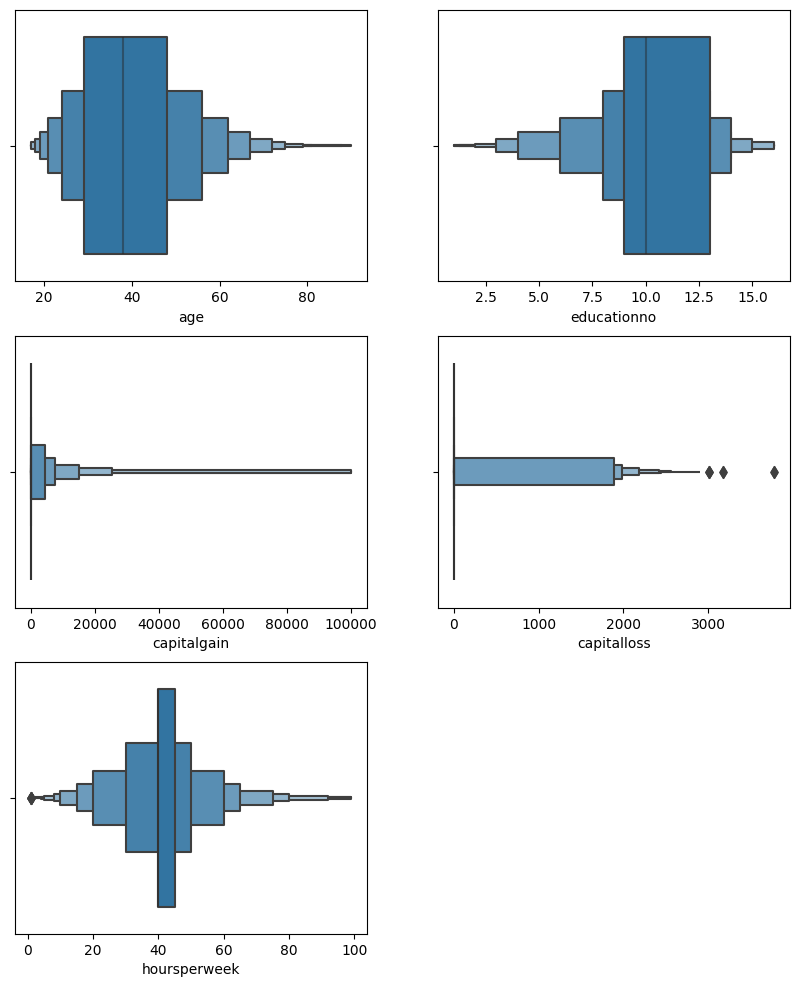

In [131]:
plt.figure(figsize=(10,12))
for i in range(len(num_columns)):
    plt.subplot(3,2,i+1)
    sns.boxenplot(data=test_data, x = num_columns[i])

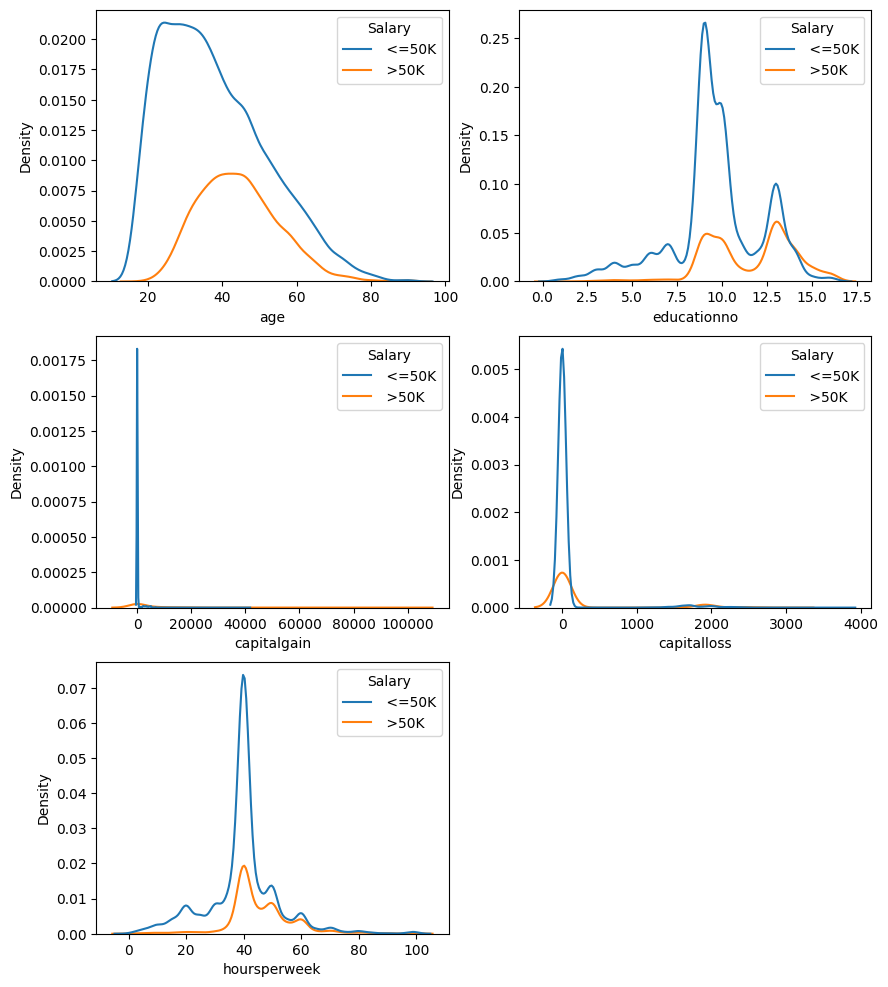

In [132]:
plt.figure(figsize=(10,12))
for i in range(len(num_columns)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=test_data, x = num_columns[i], hue="Salary")

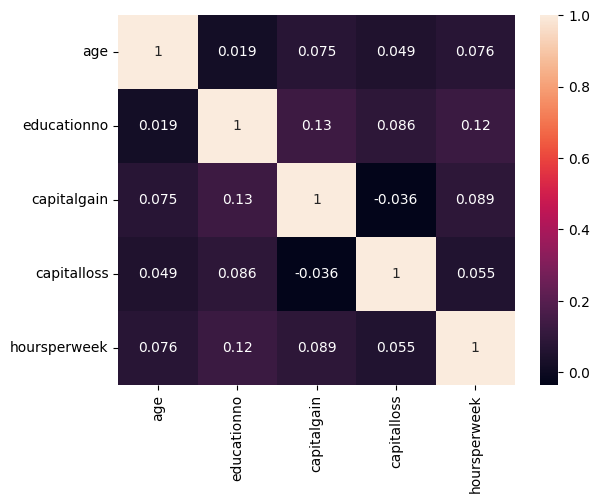

In [133]:
sns.heatmap(test_data[num_columns].corr(), annot=True);

### test_data categorical variable visualization

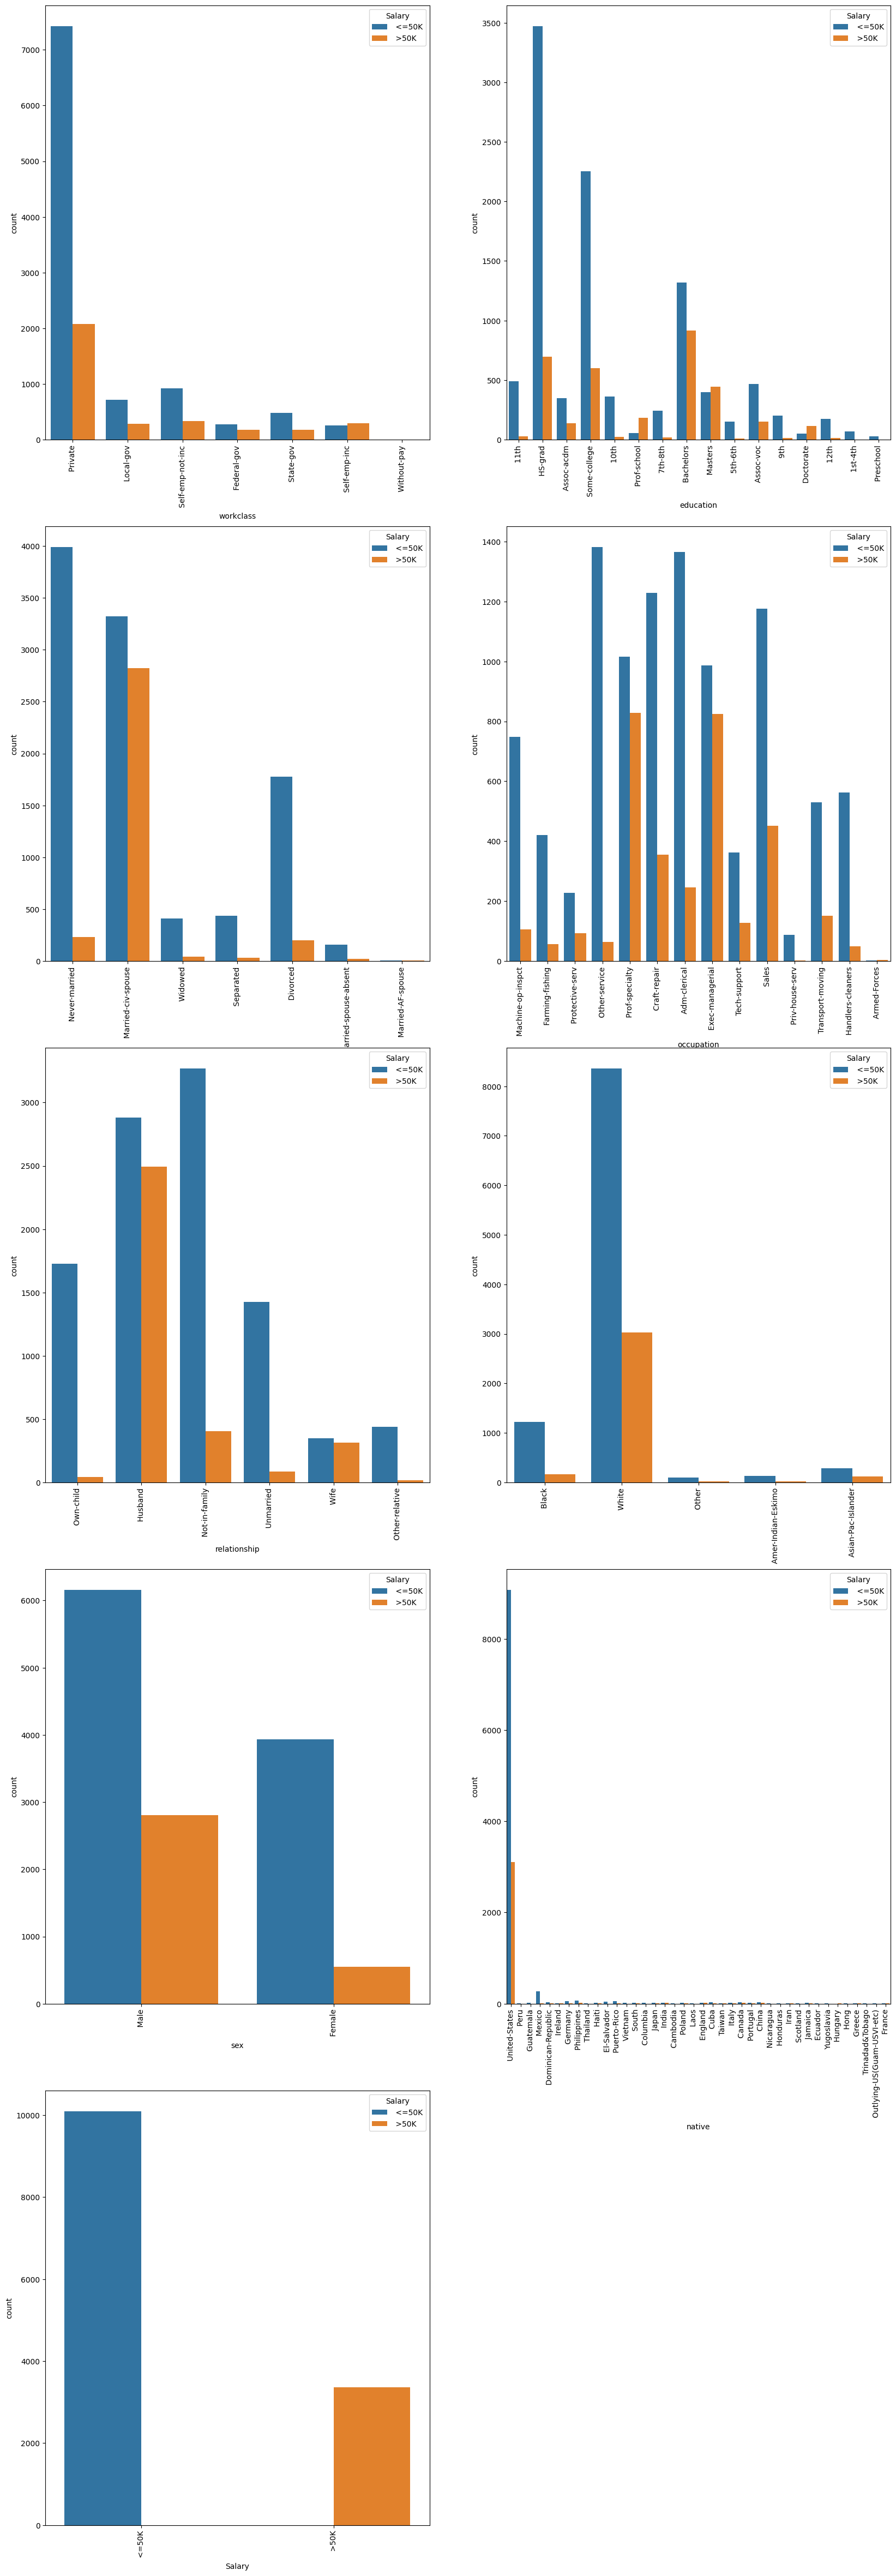

In [134]:
plt.figure(figsize=(20,60))
for i in range(len(cat_columns)):
    plt.subplot(5,2,i+1)
    sns.countplot(data=test_data, x = cat_columns[i],hue = "Salary")
    plt.xticks(rotation=90)

Text(0.5, 1.0, 'gender Distribution')

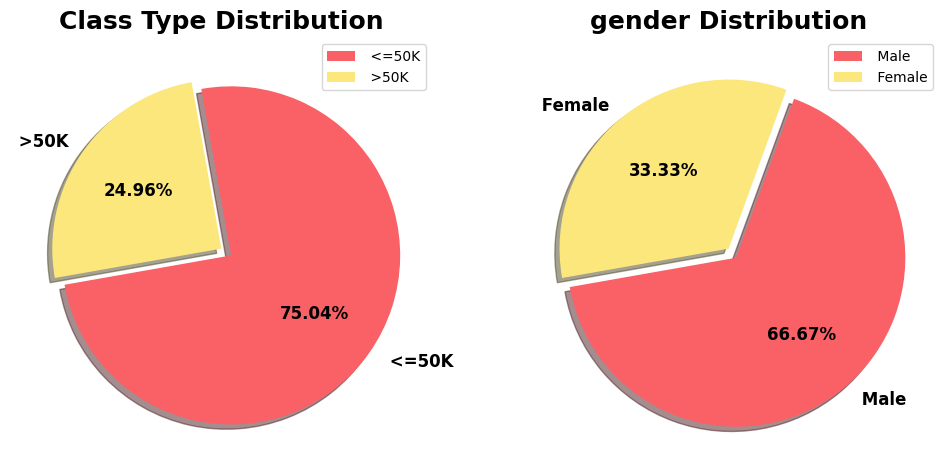

In [135]:

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.pie(test_data['Salary'].value_counts(),
       labels=test_data.Salary.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})

plt.legend(loc= 'upper right')
plt.title("Class Type Distribution", fontsize = 18, fontweight = 'bold')

plt.subplot(1,2,2)
plt.pie(test_data['sex'].value_counts(),
       labels=test_data.sex.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
                   
plt.legend(loc= 'upper right')
plt.title("gender Distribution", fontsize = 18, fontweight = 'bold')

### Preprocess

In [105]:
# Label Encoding of categrical variables
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [137]:
train_data["workclass"]=label_encoder.fit_transform(train_data["workclass"])
train_data["education"]=label_encoder.fit_transform(train_data["education"])
train_data["maritalstatus"]=label_encoder.fit_transform(train_data["maritalstatus"])
train_data["occupation"]=label_encoder.fit_transform(train_data["occupation"])
train_data["relationship"]=label_encoder.fit_transform(train_data["relationship"])
train_data["race"]=label_encoder.fit_transform(train_data["race"])
train_data["sex"]=label_encoder.fit_transform(train_data["sex"])
train_data["native"]=label_encoder.fit_transform(train_data["native"])
train_data['Salary'] = np.where(train_data['Salary'].str.contains(" >50K"), 1, 0)

# salary >50k : 1
# salary <50k : 0

In [139]:
test_data["workclass"]=label_encoder.fit_transform(test_data["workclass"])
test_data["education"]=label_encoder.fit_transform(test_data["education"])
test_data["maritalstatus"]=label_encoder.fit_transform(test_data["maritalstatus"])
test_data["occupation"]=label_encoder.fit_transform(test_data["occupation"])
test_data["relationship"]=label_encoder.fit_transform(test_data["relationship"])
test_data["race"]=label_encoder.fit_transform(test_data["race"])
test_data["sex"]=label_encoder.fit_transform(test_data["sex"])
test_data["native"]=label_encoder.fit_transform(test_data["native"])
test_data['Salary'] = np.where(test_data['Salary'].str.contains(" >50K"), 1, 0)

In [144]:
x_train = train_data.iloc[:,0:13]
y_train = train_data.iloc[:,-1]

In [149]:
x_test = test_data.iloc[:,0:13]
y_test = test_data.iloc[:,-1]

In [152]:
print("x_train shape : ", x_train.shape)
print("y_train shape : ", y_train.shape)
print("x_test shape : ", x_test.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (24943, 13)
y_train shape :  (24943,)
x_test shape :  (13450, 13)
y_test shape :  (13450,)


## Training and fitting he model

In [166]:
# GaussianNB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [167]:
# CategoricalNB

from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(x_train, y_train)

CategoricalNB()

In [169]:
# MultinomialNB

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

## predict and find accuracy

In [170]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [179]:
def print_score(model, x_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(x_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(x_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

In [180]:
print_score(gnb, x_train, y_train, x_test, y_test, train=True)
print_score(gnb, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 79.43%
Confusion Matrix: 
 [[17449  1037]
 [ 4095  2362]]

Test Result:
Accuracy Score: 79.61%
Confusion Matrix: 
 [[9548  545]
 [2197 1160]]



In [173]:
print_score(cnb, x_train, y_train, x_test, y_test, train=True)
print_score(cnb, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 85.31%
Confusion Matrix: 
 [[16972  1514]
 [ 2151  4306]]

Test Result:
Accuracy Score: 85.26%
Confusion Matrix: 
 [[9260  833]
 [1150 2207]]



In [174]:
print_score(mnb, x_train, y_train, x_test, y_test, train=True)
print_score(mnb, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 76.67%
Confusion Matrix: 
 [[17552   934]
 [ 4886  1571]]

Test Result:
Accuracy Score: 77.31%
Confusion Matrix: 
 [[9624  469]
 [2583  774]]

